In [30]:
#Importing my libraries and defining them (WENDY)
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Conecting my SQL to my Python (WENDY)
conn = psycopg2.connect(
    host="localhost",
    database="DBM assignment 1",
    user="postgres",
    password="Wendy888",
    port="5432"
)


In [32]:
#creating my cursor and connectin it (WENDY)
cur = conn.cursor()

In [33]:
#Defining my sql query so that it can be a variable in python (WENDY)
review_query = """SELECT  movie_box_office."title",
    "worldwide_box_office",
    "international_box_office",
    "domestic_box_office",
    "average_score"
FROM (
    SELECT "title", "worldwide_box_office", 
	"international_box_office", "domestic_box_office" 
    FROM public."Movie"
) AS movie_box_office
INNER JOIN (
    SELECT "title", ROUND(AVG("idvscore"), 0) AS average_score
    FROM public."Review"
    WHERE "role" = 'expert'
    GROUP BY "title"
) AS expert_avg_scores
ON movie_box_office."title" = expert_avg_scores."title";
"""


In [34]:
#excecuting my query with the cursur and also fetching the data to display (WENDY) 
cur.execute(review_query)
review_results = cur.fetchall()

In [35]:
#creating a dataframe with my wanted columns and displaying the head with first 5 rows (WENDY)
query_df = pd.DataFrame(review_results, columns=["title",
    "worldwide_box_office",
    "international_box_office",
    "domestic_box_office",
    "average_score"])
query_df.head()

,title,worldwide_box_office,international_box_office,domestic_box_office,average_score
0,Antitrust-2001-01-12,17865209,6900000,10965209,38
1,Santitos-2000-01-28,0,0,378562,72
2,A Walk to Remember-2002-01-25,46060861,4833792,41227069,43
3,The Killing of John Lennon-2008-01-02,0,0,6975,52
4,Mad Money-2008-01-18,25044057,4375214,20668843,47


In [36]:
#Showing what the lowest and higest scores are that trhe experts give (WENDY)
lowest_value = query_df["average_score"].min()
highest_value = query_df["average_score"].max()
print(lowest_value,highest_value)

11 97


In [37]:
#creating a correlation matrix for the 3 box offices (WENDY)
# here average score is the independant variable and the box offices are dependent (WENDY)
corr_matrix = query_df[["average_score", "worldwide_box_office" , "international_box_office", "domestic_box_office"]].corr()
corr_matrix

,average_score,worldwide_box_office,international_box_office,domestic_box_office
average_score,1.000000,0.061338,0.060635,0.054221
worldwide_box_office,0.061338,1.000000,0.984664,0.953856
international_box_office,0.060635,0.984664,1.000000,0.887618
domestic_box_office,0.054221,0.953856,0.887618,1.000000


Text(0.5, 1.0, 'Correlation matrix')

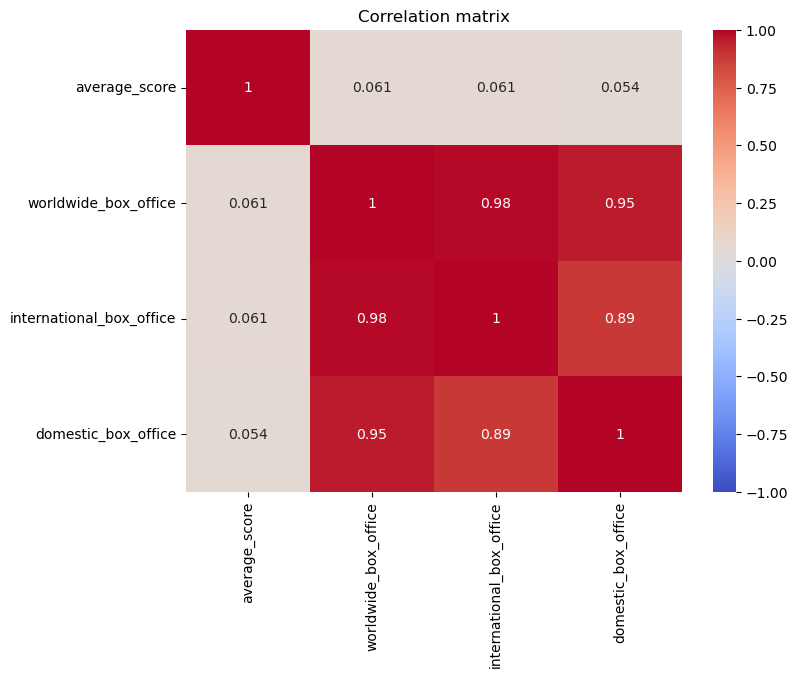

In [38]:
#Creating a heat map with the correlation matrix (WENDY)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")


T-Test for Worldwide Box Office: t-statistic = 1.4709904868252122, p-value = 0.14134217855254194


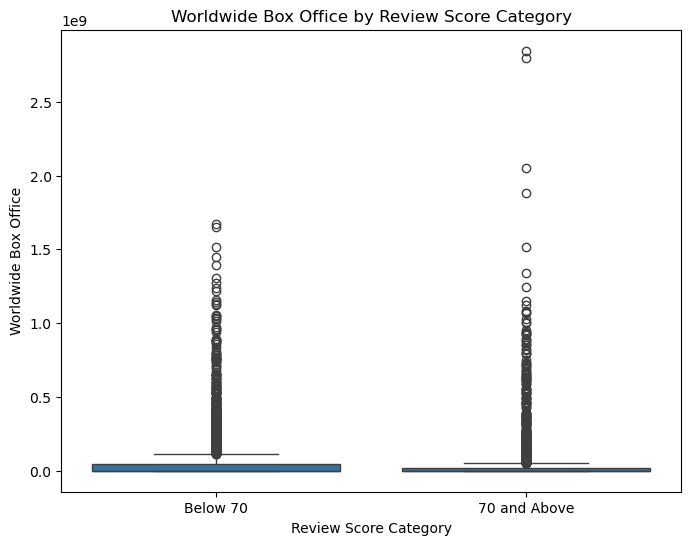

In [39]:


# Categorizing movies into two groups based on the average score (70 and above, below 70) (WENDY)
query_df['score_category'] = np.where(query_df['average_score'] >= 70, '70 and Above', 'Below 70')

# Performing the t-test for worldwide box office as an example (WENDY)
t_statistic, p_value = ttest_ind(
    query_df[query_df['score_category'] == '70 and Above']['worldwide_box_office'], 
    query_df[query_df['score_category'] == 'Below 70']['worldwide_box_office'],
    nan_policy='omit')
print(f'T-Test for Worldwide Box Office: t-statistic = {t_statistic}, p-value = {p_value}')

# Visualizing the data with a simple box plot (WENDY)
plt.figure(figsize=(8, 6))
sns.boxplot(x='score_category', y='worldwide_box_office', data = query_df)
plt.title('Worldwide Box Office by Review Score Category')
plt.xlabel('Review Score Category')
plt.ylabel('Worldwide Box Office')
plt.show()
